### Import

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

import scipy as sp
from scipy import stats

from imblearn.over_sampling import SMOTE

import pickle

from sklearn import model_selection

import missingno as msno

<br>

## 1. Preparing dataset (2번부터 실습 진행)

In [2]:
data_df = pd.read_csv('titanic.csv')

## Data info

- **PassengerId** : Unique ID of passenger
- **Survived** : 0 = No, 1 = Yes
- **pclass** : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sibsp** : # of siblings & spouses aboard the Titanic
- **parch** : # of parents / children aboard the Titanic
- **ticket** : Ticket number
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
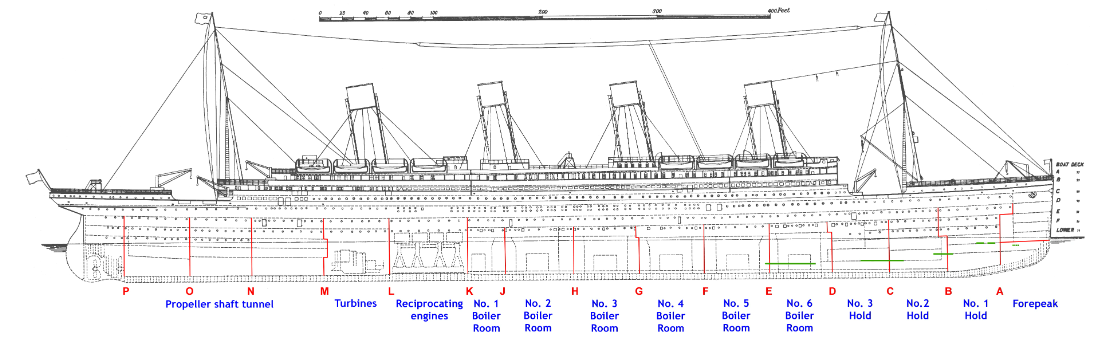
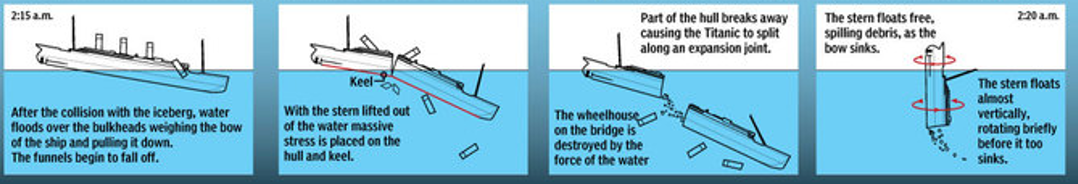


영상으로 확인하기
https://youtu.be/qxHNLVNC5eU

In [3]:
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Feature 데이터 둘러보기 (Feature에 대해서 이해하기)

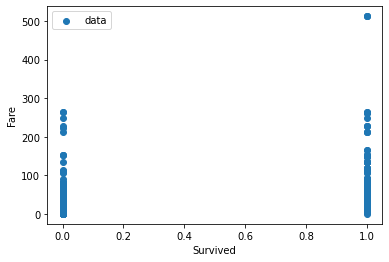

In [4]:
# 생존과 Fare의 분포 확인
plt.scatter(data_df['Survived'], data_df['Fare'], label = "data")

plt.legend(loc = "best")
plt.ylabel('Fare')
plt.xlabel('Survived')

plt.rcParams["figure.figsize"] = (10,14)

plt.show()

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

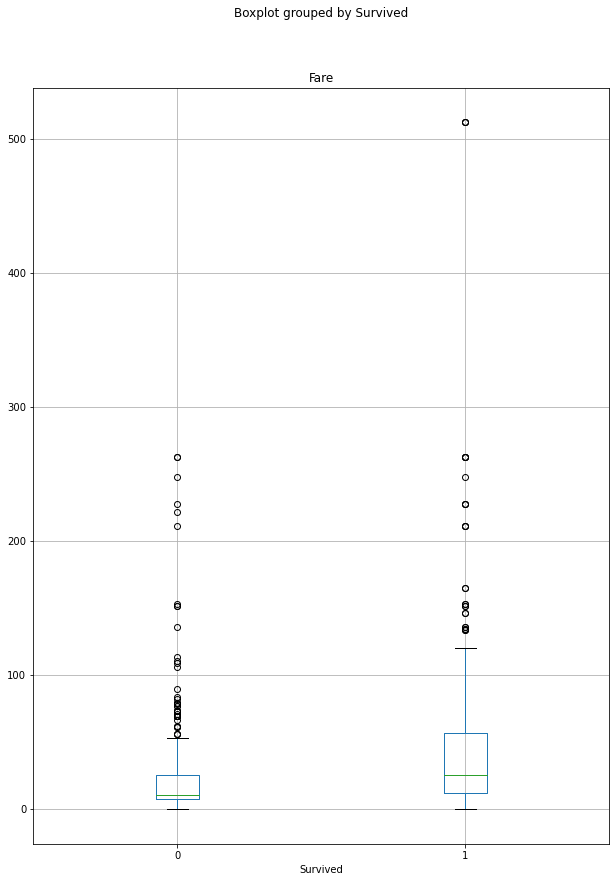

In [5]:
data_df.boxplot(column='Fare', by='Survived')

In [6]:
# 생존자와 비생존자의 Fare 값 평균 사이의 차이에 대함.

save = data_df[ data_df['Survived']== 1 ].Fare.values

die  =  data_df[ data_df['Survived']== 0 ].Fare.values

stats.ttest_ind(save, die)


Ttest_indResult(statistic=7.939191660871055, pvalue=6.120189341924198e-15)

귀무가설 : 두 자료에 대해서 관계가 없다
귀무가설이 참이라고 가정한 뒤 P-VALUE 값을 확인해 보니 5% 미만이였다.
따라서 두 자료에 대해서 관계가 없는 것을 기각한다.

생존자와 비생존자의 Fare의 평균값 사이의 유 의미한 차이가 있다.
라고 통계적으로 결론을 지을 수 있다.

<AxesSubplot:title={'center':'Fare'}, xlabel='Pclass'>

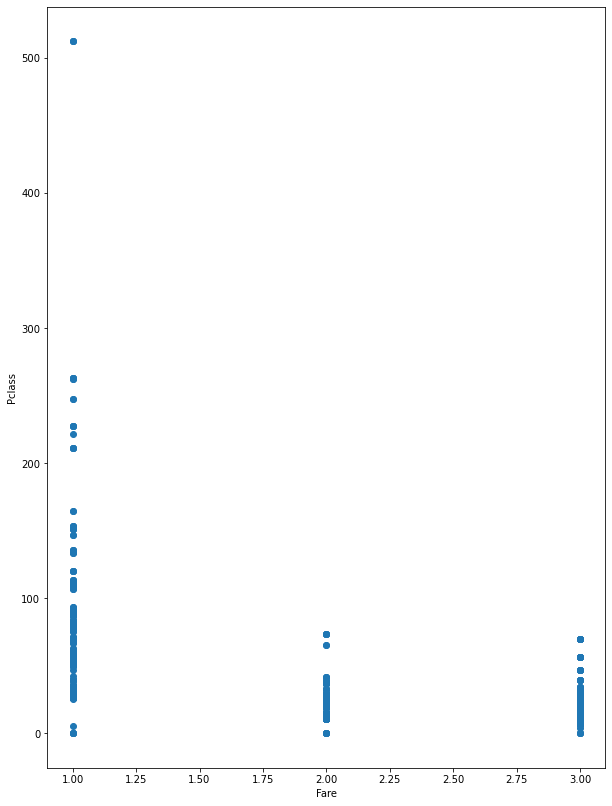

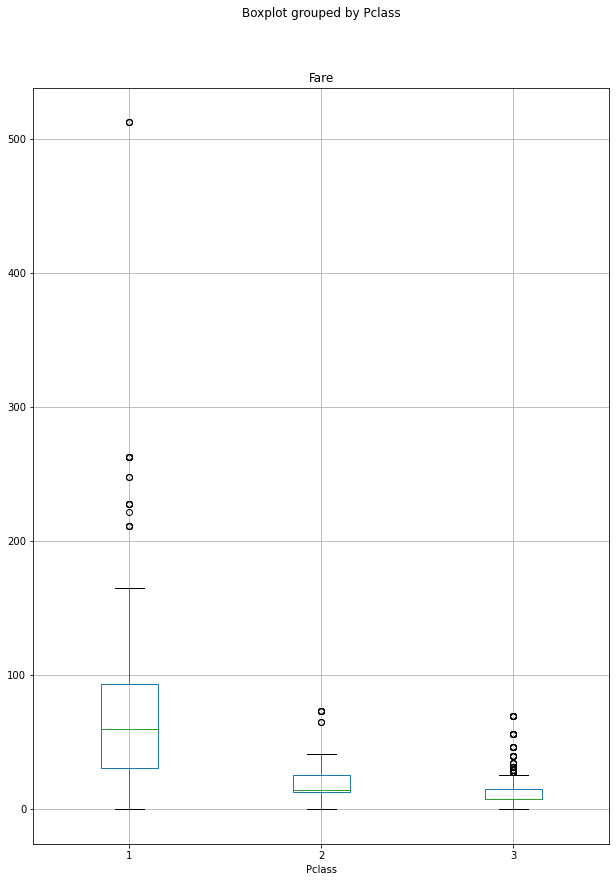

In [7]:
# Pclass 와 Fare의 분포 확인
plt.scatter(data_df['Pclass'], data_df['Fare'], label = "data")

plt.xlabel('Fare')
plt.ylabel('Pclass')

plt.rcParams["figure.figsize"] = (10,14)
data_df.boxplot(column='Fare', by='Pclass')

<AxesSubplot:ylabel='Pclass1, survivied'>

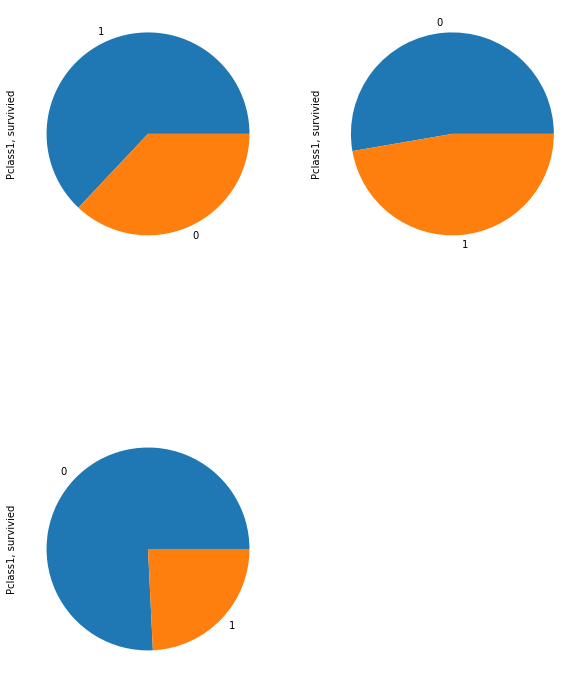

In [8]:
# Pclass별 생존 분포 확인
# nrows=1, ncols=2, index=1
plt.subplot(2, 2, 1)                
df = data_df[data_df['Pclass'] == 1]
df['Survived'].value_counts().plot(kind = 'pie', label = 'Pclass1, survivied')
# df #216명이 Pclass1에 탑승함
# df[df['Survived']==0] #80    37% 는 죽음
# df[df['Survived']==1] #136   63% 는 생존

plt.subplot(2, 2, 2)
df = data_df[data_df['Pclass'] == 2]
df['Survived'].value_counts().plot(kind = 'pie', label = 'Pclass1, survivied')
#df #184명이 Pclass2에 탑승함
#df[df['Survived']==0] #97   52%는 죽음
#df[df['Survived']==1] #87   47%는 생존


plt.subplot(2, 2, 3)  
df = data_df[data_df['Pclass'] == 3]
df['Survived'].value_counts().plot(kind = 'pie', label = 'Pclass1, survivied')
#df #491명이 Pclass3에 탑승함
#df[df['Survived']==0] #372  76%는 죽음
#df[df['Survived']==1] #119  24%는 생존


In [9]:
#탑승 항구에 따른 Pclass 카운트
print(data_df[ data_df['Embarked']== 'C' ].Pclass.value_counts())+
print(data_df[ data_df['Embarked']== 'S' ].Pclass.value_counts())
print(data_df[ data_df['Embarked']== 'Q' ].Pclass.value_counts())

SyntaxError: invalid syntax (<ipython-input-9-edad499ce478>, line 2)

<br>

## 2. Feature engineering & Feature selection

#### 시도해볼 수 있는 전략들

- 불필요한 열이나 예측에 방해가 되는 열은 아예 지우기 (ex. PassengerId)
- 결측치 채우기 
- Text로 되어있는 Category(Factor)는 숫자로 바꿔주기 (ex. Male/Female -> 0/1)
- 실수 범위를 구간 범위로 바꿔주기 
- 필요한 경우 기존 열을 바탕으로 새로운 열을 계산해 추가하기

In [10]:
# Target == y_data
y_data = data_df[['Survived']]

In [11]:
del data_df['Survived']

# Feature == x_data
x_data = data_df.copy()

In [12]:
# 필요없는 feature 삭제
del x_data["PassengerId"]

<AxesSubplot:>

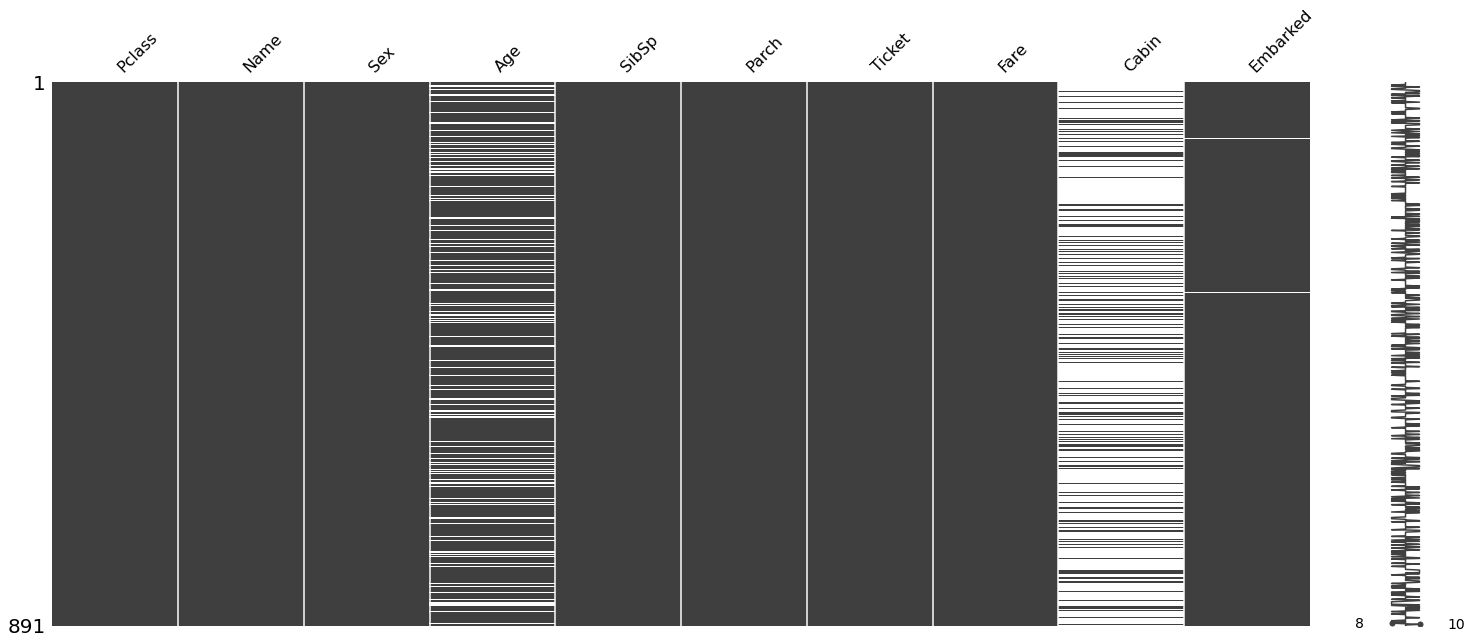

In [13]:
# 결측치 확인
msno.matrix(x_data.sample(891))

### 전처리 첫번째 결측치 채우기

In [14]:
#상관관계에 따른 모집단에 대한 평균으로 결측치 채우는 방법
age_corr = x_data[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']]
print(age_corr.corr())

# Pclass와 상관계수가 가장높아서 Pclass별 평균나이로 결측치 채워줌 (아래서 예측모델로 다시 채울겁니다.)
# Pclass별 나이평균
x_data.groupby("Pclass")["Age"].mean()

#Pclass별 평균값으로 채워주기
x_data['Age'] = x_data.groupby('Pclass')['Age'].apply(lambda x: x.fillna(x.mean()))
x_data

             Age    Pclass     SibSp     Parch      Fare
Age     1.000000 -0.369226 -0.308247 -0.189119  0.096067
Pclass -0.369226  1.000000  0.083081  0.018443 -0.549500
SibSp  -0.308247  0.083081  1.000000  0.414838  0.159651
Parch  -0.189119  0.018443  0.414838  1.000000  0.216225
Fare    0.096067 -0.549500  0.159651  0.216225  1.000000


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,B42,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,NaN,S
889,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C148,C


In [15]:
# 예측모델을 사용한 Age 채우기
# new age read of pkl
with open("age_df.pkl","rb") as fr:
    data = pickle.load(fr)

# change age dataframe
x_data['Age'] = data['EstAge']

x_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19,1,2,W./C. 6607,23.4500,NaN,S
889,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [16]:
# 결측치확인 - 2개의 값이 누락되어있음
x_data[x_data['Embarked'].isnull()]


#이름으로 관련 검색(https://www.encyclopedia-titanica.org/)
#https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

#사우스햄스턴탑승자로 검색완료 채워줌

x_data['Embarked'] = x_data['Embarked'].fillna('S')

In [17]:
# 예측 모델을 활용한 Cabin 결측치에 관한 새로운 열을 만들었다.
with open("deck_df.pkl","rb") as fr:
    data = pickle.load(fr)
    
x_data['dect'] = data

del x_data['Cabin']

In [18]:
x_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,dect
0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,3
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,3
2,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,6
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,3
4,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,6
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,4
887,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,2
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19,1,2,W./C. 6607,23.4500,S,6
889,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,3


### 전처리 두번째 numberring

In [19]:
# preparing 'Sex' male == 1 female == 2
x_data['Sex'] = x_data['Sex'].replace(['male', 'female'],[1, 2])

In [20]:
# 같은 Ticket을 가진경우 일행으로 판단(잠재적인 조력자) 하고 class

Ticket_num = []  # 동일한 티켓번호를 가진사람 수(자신포함) 
Ticket_v_c = x_data.Ticket.value_counts()  #같은티켓번호 count해줌
# value_counts()값의 key값을넣어주고 value값을 가져옴
for i in x_data['Ticket']:
    Ticket_num.append(Ticket_v_c[i])

x_data['Ticket_num'] = Ticket_num

#쓰고 난뒤 Ticket열 삭제
del x_data['Ticket']

In [21]:
# Lastname Surname 분류
Lastnames = []
Surnames = []
for i in data_df.Name:
    Lastname = str(i).split(',',1)[0]
    Lastnames.append(Lastname)
    Surname = str(i).split(', ',1)[1].split('.',1)[0]
    Surnames.append(Surname)
x_data['Lastname'] = Lastnames
x_data['Surname'] = Surnames

del x_data['Lastname']
del x_data['Name']
x_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,dect,Ticket_num,Surname
0,3,1,22,1,0,7.2500,S,3,1,Mr
1,1,2,38,1,0,71.2833,C,3,1,Mrs
2,3,2,26,0,0,7.9250,S,6,1,Miss
3,1,2,35,1,0,53.1000,S,3,2,Mrs
4,3,1,35,0,0,8.0500,S,6,1,Mr
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.0000,S,4,1,Rev
887,1,2,19,0,0,30.0000,S,2,1,Miss
888,3,2,19,1,2,23.4500,S,6,2,Miss
889,1,1,26,0,0,30.0000,C,3,1,Mr


# 호칭에 따라 사회적 지위(1910년대 기준)를 정의
명예직 ['Rev', 'Col', 'Major','Dr', 'Capt', 'Sir']

여성 ['Ms', 'Mme', 'Mrs', 'Dona']

귀족이나 작위 = ['Jonkheer', 'the Countess']

남성 = ['Mr', 'Don']

젊은 남성 ['Master']

젊은 여성 ['Miss', 'Mlle', 'Lady']

In [30]:
x_data.Surname.value_counts()

0    518
2    185
1    127
3     40
4     19
5      2
Name: Surname, dtype: int64

In [41]:
x_data['Surname'] = x_data['Surname'].replace(['Mr', 'Don'],[0, 0]) # 남성 class == 0
x_data['Surname'] = x_data['Surname'].replace(['Ms', 'Mme', 'Mrs'],[1, 1, 1]) # 여성 class == 1
x_data['Surname'] = x_data['Surname'].replace(['Miss', 'Mlle', 'Lady'],[2, 2, 2]) # 젊은 여성 class == 2
x_data['Surname'] = x_data['Surname'].replace(['Master'],[3]) # 젊은 남성 class == 3
x_data['Surname'] = x_data['Surname'].replace(['Rev', 'Col', 'Major','Dr', 'Capt', 'Sir'],[4, 4, 4, 4, 4, 4]) # 명예직 class = 4
x_data['Surname'] = x_data['Surname'].replace(['Jonkheer', 'the Countess'],[5, 5]) #귀족이나 작위 class == 5

In [48]:
# x_data Surname이 있을때 성능이 감소하는 경향이 있었습니다.
del x_data['Surname']

<br>

## 2. Train - Test split (비율을 7:3 으로 유지해주시고, seed는 0을 적용해주세요)

In [42]:
# xnp_data = np.array(x_data)
# ynp_data = np.array(y_data)

In [43]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3, random_state = 0)

In [44]:
# numeric 과 categoric 분리

numeric_features = ['Age','Fare']
numeric_transformer = StandardScaler() # cf) RobustScaler

categorical_features = ['Pclass', 'Sex','Embarked', 'dect','Ticket_num','SibSp', 'Parch']# 'Surname']
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown='ignore')

In [45]:
# pipeline
preprocessor = ColumnTransformer(
    transformers=[ # List of (name, transformer, column(s))
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

preprocessor_pipe = Pipeline(steps=[('preprocessor', preprocessor)])

preprocessor_pipe.fit(x_train)

x_train_transformed = preprocessor_pipe.transform(x_train)
x_test_transformed = preprocessor_pipe.transform(x_test)

<br>

## 3. Create model instance variable (동시에 여러 모델을 다른 이름으로 만들 수 있습니다.)

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=200, random_state=0)
model.fit(x_train_transformed, y_train) # <- x_train_transformed (not x_train)

accuracy = model.score(x_test_transformed, y_test)
print("model score:", round(accuracy, 4))

model score: 0.8209


In [ ]:
뉴메리컬, 카테고리컬 파이프 라인

성능 지표를 활용하여 각 모델 성능 올리기

파라미터 수정
auc 커브를 활용한 ~~

모델 간 성능 비교하여 최적 모델 찾기

<br>

## 4. Train the model

<br>

## 5. Predict on test data & Check the result with metrics (모델 간 비교가 가능합니다.)